In [2]:
from __future__ import division
import os,time,pdb
import numpy as np

#web 
import urllib

#reddit
import praw

#nlp
import nltk, re, pprint
from nltk.stem import *
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize
from bs4 import BeautifulSoup
from bs4 import SoupStrainer
stemmer = SnowballStemmer("english")

#scikit-learn
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
from sklearn import manifold

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline
# Set some default plotting parameters
mpl.rcParams['image.aspect'] = 'auto'
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['image.cmap'] = 'gray'
mpl.rcParams['figure.figsize'] = (6, 6)
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize']  = 20
mpl.rcParams['legend.fontsize'] = 20

# Helper functions


In [10]:
def order_soup(url=None):
    assert url is not None
    r = urllib.urlopen(url).read()
    return BeautifulSoup(r)

def get_subreddit_comments(url=None, tag='main'):
    soup = order_soup(url)
    comments = soup.find_all("div", class_= tag)
    text_list = []
    for node in comments:
        text_list.append(''.join(node.findAll(text=True)))
    return text_list

def tokenize_it(text_list):
    return word_tokenize(text_list)

def stem_list(word_list):
    mapstem = lambda x: stemmer.stem(x)    
    tokens = tokenize_it(word_list)
    stem_dep = map(mapstem,tokens)
    
def get_comments_from_url_list(url_list, tag, n=20, verbose=True):
    text = []
    for j in xrange(n):
        for i in xrange(len(url_list)):
            if verbose:
                print url_list[i], j
            comments = get_subreddit_comments(url=url_list[i],tag=tag)
            text.extend(comments)
        if len(text)!=0:
            break
    return text

#Scrape comments from reddit 

In [4]:
sch_urls = ['https://www.reddit.com/r/schizophrenia/comments/52ravk/feeling_weirdparanoid_about_my_so/',
            'https://www.reddit.com/r/schizophrenia/comments/52rn7m/advice_on_a_relationship_with_my_schizophrenic/',
            'https://www.reddit.com/r/schizophrenia/comments/52px9z/just_have_a_couple_questions_longish_post/'
           ]

dep_urls = ['https://www.reddit.com/r/depression/comments/52t53u/is_there_anyone_here_who_is_about_to_write_a_text/',
            'https://www.reddit.com/r/depression/comments/52qfqs/that_awkward_moment_when_you_wake_up_and_have_to/',
            'https://www.reddit.com/r/depression/comments/52rwki/how_do_i_come_to_terms_with_my_belowaverage/'
           ]

In [11]:
text_dep = get_comments_from_url_list(sch_urls, tag="usertext-body may-blank-within md-container ")

https://www.reddit.com/r/schizophrenia/comments/52ravk/feeling_weirdparanoid_about_my_so/ 0
https://www.reddit.com/r/schizophrenia/comments/52rn7m/advice_on_a_relationship_with_my_schizophrenic/ 0
https://www.reddit.com/r/schizophrenia/comments/52px9z/just_have_a_couple_questions_longish_post/ 0
https://www.reddit.com/r/schizophrenia/comments/52ravk/feeling_weirdparanoid_about_my_so/ 1
https://www.reddit.com/r/schizophrenia/comments/52rn7m/advice_on_a_relationship_with_my_schizophrenic/ 1
https://www.reddit.com/r/schizophrenia/comments/52px9z/just_have_a_couple_questions_longish_post/ 1
https://www.reddit.com/r/schizophrenia/comments/52ravk/feeling_weirdparanoid_about_my_so/ 2
https://www.reddit.com/r/schizophrenia/comments/52rn7m/advice_on_a_relationship_with_my_schizophrenic/ 2
https://www.reddit.com/r/schizophrenia/comments/52px9z/just_have_a_couple_questions_longish_post/ 2
https://www.reddit.com/r/schizophrenia/comments/52ravk/feeling_weirdparanoid_about_my_so/ 3
https://www.reddi

In [ ]:
text_sch = []
for i in xrange(len(sch_urls)):
    sch_urls[i]
    comments = get_subreddit_comments(url=sch_urls[i],tag="usertext-body may-blank-within md-container ")
    text_sch.extend(comments)    
    print comments

# Count vectors

### Scikit's example

In [12]:
categories = ['alt.atheism', 'soc.religion.christian']
twenty_train = fetch_20newsgroups(subset='train',
    categories=categories, shuffle=True, random_state=42)
print("\n".join(twenty_train.data[0].split("\n")[:3]))
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
print X_train_counts.shape, len(twenty_train.data)

From: nigel.allen@canrem.com (Nigel Allen)
Subject: library of congress to host dead sea scroll symposium april 21-22
Lines: 96
(1079, 19666) 1079


### reddit result

In [55]:
[0]+[0]

[0, 0]

In [57]:
count_vect = CountVectorizer()
count_vect.fit(text_dep+text_sch)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [59]:
text_sch_counts = count_vect.transform(text_sch)
text_dep_counts = count_vect.transform(text_dep)

In [60]:
text_dep_counts.shape, len(text_dep), text_sch_counts.shape, len(text_sch)

((47, 1418), 47, (23, 1418), 23)

# Frequency vectors

In [61]:
tfidf_transformer_dep = TfidfTransformer()
dep_tfidf = tfidf_transformer_dep.fit_transform(text_dep_counts)

In [62]:
tfidf_transformer_sch = TfidfTransformer()
sch_tfidf = tfidf_transformer_sch.fit_transform(text_sch_counts)

In [66]:
sch_tfidf.shape, dep_tfidf.shape, np.vstack([dep_tfidf.toarray(),sch_tfidf.toarray()]).T.shape

((23, 1418), (47, 1418), (1418, 70))

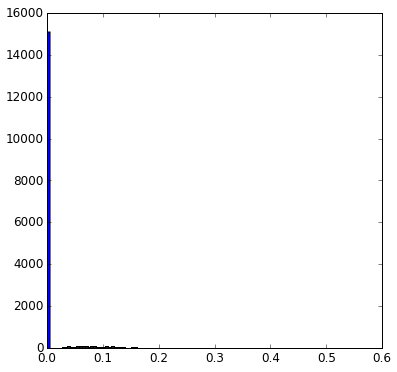

In [26]:
h = plt.hist(dep_tfidf.toarray().flatten(),100)
plt.show()

# Visualizations

## PCA

In [74]:
pca = PCA(n_components=2)
X = np.vstack([dep_tfidf.toarray(),sch_tfidf.toarray()])
Y = pca.fit_transform(X)

In [75]:
Y.shape

(70, 2)

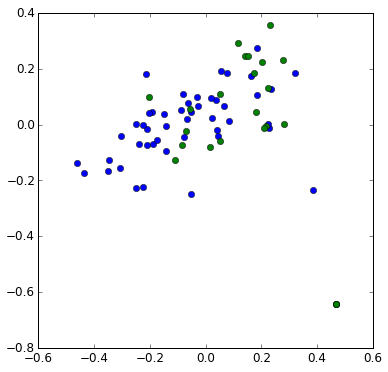

In [76]:
n = dep_tfidf.shape[0]
plt.plot(Y[:n,0],Y[:n,1],'o')
plt.plot(Y[n:,0],Y[n:,1],'o')

## t-SNE

In [ ]:
tsne = manifold.TSNE(n_components=2)
Y2 = tsne.fit_transform(X)